# **V6 on Synthetic Datatest**

In [1]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from utils.wrapper import YOLOAPIWrappper
from utils.pipeline import CPPipeline

### **Additive**

In [2]:
v6 = "../utils/v6/bestv6.onnx"
yolov6_detector_synth = YOLOAPIWrappper(v6,file_path='../calibration/calibv6_synth_a.pickle', conf_thres=0.7, iou_thres=0.5)
pipev6_synth = CPPipeline(yolov6_detector_synth, test_set='test_synth', method='additive')

In [4]:
X_train, y_train, labels_train= pipev6_synth.extract_yolo_dataset()
X_train, X_val, y_train, y_val, labels_train, labels_val = pipev6_synth.calibration_and_val(X_train, y_train, labels_train)
conformal_predictor= pipev6_synth.pipeline( X_train=X_train, y_train= y_train, labels_train= labels_train)

Predictions: [[1348.74682617 1237.56884766 1620.20532227 1438.43652344]
 [ 881.45123291  982.50598145 1115.69140625 1166.31774902]
 [ 649.581604   1249.57531738  707.28326416 1320.94055176]
 ...
 [ 591.09454346 1044.23034668  842.81427002 1174.17077637]
 [ 639.09924316 1092.83789062  812.71435547 1227.86474609]
 [1568.109375   1080.36865234 1812.66870117 1246.15869141]]
Matched Ground Truths: [[1339. 1240. 1610. 1440.]
 [ 879.  985. 1118. 1164.]
 [ 650. 1254.  708. 1322.]
 ...
 [ 593. 1044.  846. 1172.]
 [ 640. 1095.  811. 1227.]
 [1567. 1086. 1809. 1243.]]
Images: ['/home/aws_install/data/yolo_database/images/test_synth/WSSS_02L_35_23.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/LEMD_32R_35_21.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/RJAA_34R_35_05.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/MDSD_17_35_28.jpeg', '/home/aws_install/data/yolo_database/images/test_synth/LFRS_21_35_05.jpeg', '/home/aws_install/data/yolo_database/i

Marginal coverage: 1.0
Average area: 41363.5390625


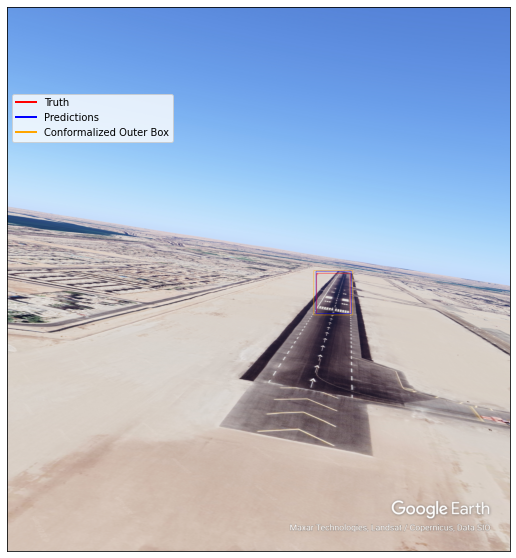

In [5]:
pipev6_synth.infer_eval_single_image(
    conformal_predictor, 
    X_val[5],  # Image path at index 5
    y_val[5],  # Ground truth bounding boxes at index 5
    labels_val[5],  # Labels at index 5
    None  
)

In [6]:
y_pred_val, y_true_val, images_val, classes_val, box_inner_val, box_outer_val = pipev6_synth.infer_all_images(conformal_predictor,X_val, y_val, labels_val, visualize = False)

Number of images: 443
Number of images without predictions: 18
Number of images with predictions: 425


In [7]:
average_glo_area, cover = pipev6_synth.average_cover_and_area(y_pred_val, y_true_val, box_outer_val)

Average area of prediction intervals: 76892.421875
Average length of prediction intervals: 277.2948303222656
Average Marginal coverage: 0.7341176470588235
